# Imports

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# from xgboost import XGBClassifier

import joblib


# Load Data

In [203]:
data = pd.read_csv('week2_modeling_data_initial_sessions.csv')
data.shape

C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\487392318.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('week2_modeling_data_initial_sessions.csv')


(624415, 14)

# EDA

In [204]:
data.head()

,user_pseudo_id,session_id,event_sequence,event_name,session_label,session_sequence,session_duration,customer_type,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items,time_to_conversion
0,+JCOGYuIB0UiMuCAfoa19Zx4/kyAS1mL/oiJpA8Efc4=.1...,1753451127,1,first_visit,initial,1,250944587,NaN,referral,app.jotform.com,desktop,NaN,NaN,0.002804
1,+JCOGYuIB0UiMuCAfoa19Zx4/kyAS1mL/oiJpA8Efc4=.1...,1753451127,2,session_start,initial,1,250944587,NaN,referral,app.jotform.com,desktop,NaN,NaN,0.002804
2,+JCOGYuIB0UiMuCAfoa19Zx4/kyAS1mL/oiJpA8Efc4=.1...,1753451127,3,page_view,initial,1,250944587,NaN,referral,app.jotform.com,desktop,NaN,NaN,0.002804
3,+JCOGYuIB0UiMuCAfoa19Zx4/kyAS1mL/oiJpA8Efc4=.1...,1753451127,4,page_view,initial,1,250944587,NaN,referral,app.jotform.com,desktop,NaN,NaN,0.002804
4,+JCOGYuIB0UiMuCAfoa19Zx4/kyAS1mL/oiJpA8Efc4=.1...,1753451127,5,view_item_list,initial,1,250944587,NaN,referral,app.jotform.com,desktop,NaN,NaN,0.002804


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624415 entries, 0 to 624414
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_pseudo_id         624415 non-null  object 
 1   session_id             624415 non-null  int64  
 2   event_sequence         624415 non-null  int64  
 3   event_name             624415 non-null  object 
 4   session_label          624415 non-null  object 
 5   session_sequence       624415 non-null  int64  
 6   session_duration       624415 non-null  int64  
 7   customer_type          98488 non-null   object 
 8   traffic_source_medium  623037 non-null  object 
 9   traffic_source         623464 non-null  object 
 10  device_category        624415 non-null  object 
 11  total_item_quantity    107770 non-null  float64
 12  unique_items           107770 non-null  float64
 13  time_to_conversion     624415 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [206]:
data[['session_label', 'customer_type', 'session_sequence']].value_counts()

session_label  customer_type  session_sequence
initial        notLoggedIn    1                   52015
               corporate      1                   28138
               web            1                   18207
               corporate      14                     34
                              2                      27
               notLoggedIn    64                     20
               corporate      15                     12
                              26                      7
               notLoggedIn    12                      5
               corporate      4                       5
               notLoggedIn    15                      5
               corporate      5                       3
               notLoggedIn    2                       3
                              14                      3
                              4                       2
                              26                      2
Name: count, dtype: int64

C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\1252496921.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_type', y='time_to_conversion', data=data, ci=None, palette='viridis')
C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\1252496921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_type', y='time_to_conversion', data=data, ci=None, palette='viridis')


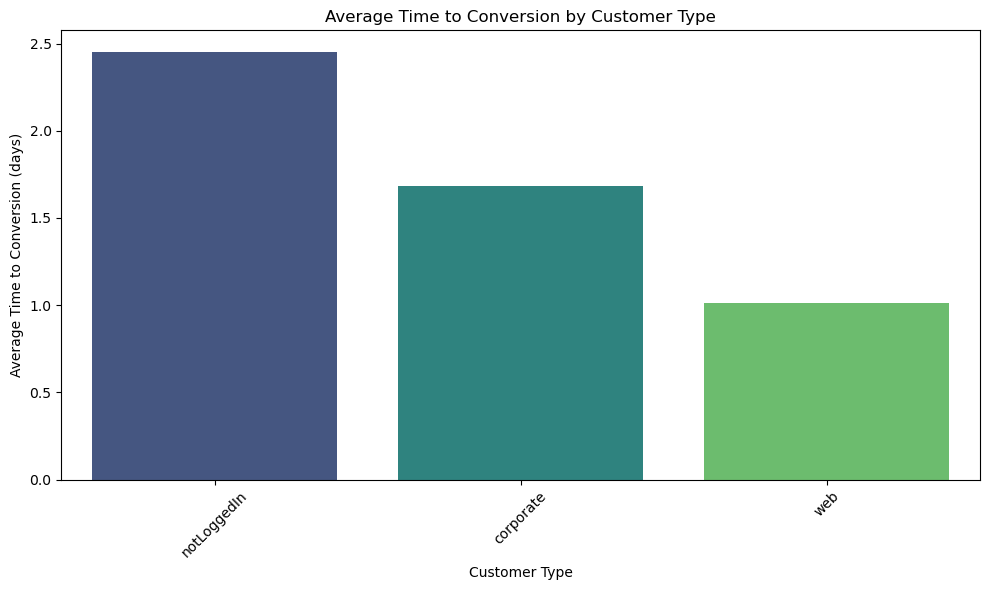

In [207]:
# visualize the average time to conversion by cutomer type
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='time_to_conversion', data=data, ci=None, palette='viridis')
plt.title('Average Time to Conversion by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Time to Conversion (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\3558092281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_type', y='time_to_conversion', data=data, palette='viridis')


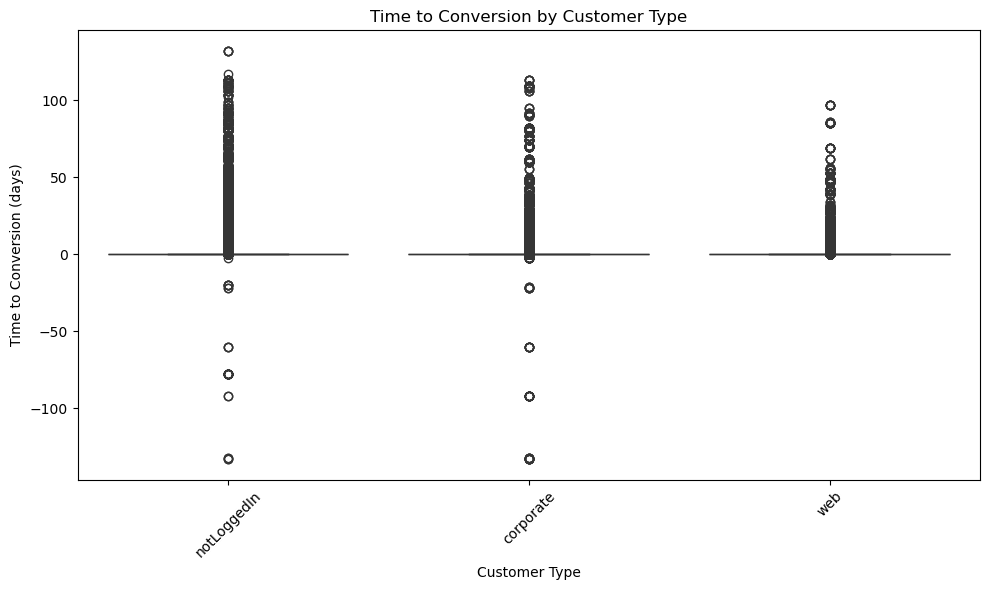

In [208]:
# visualize the average time to conversion by customer type in boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='time_to_conversion', data=data, palette='viridis')
plt.title('Time to Conversion by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Time to Conversion (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\1727969668.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='traffic_source_medium', y='time_to_conversion', data=data, ci=None, palette='plasma')
C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\1727969668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traffic_source_medium', y='time_to_conversion', data=data, ci=None, palette='plasma')


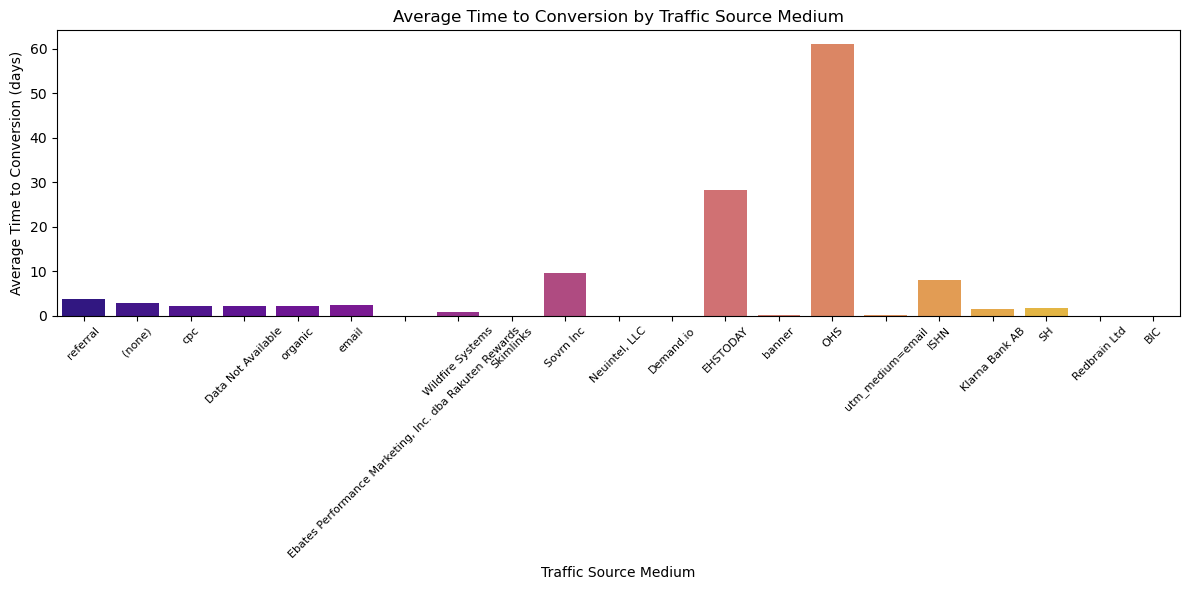

In [209]:
# visualize the average time to conversion by traffic source medium
plt.figure(figsize=(12, 6))
sns.barplot(x='traffic_source_medium', y='time_to_conversion', data=data, ci=None, palette='plasma')
plt.title('Average Time to Conversion by Traffic Source Medium')
plt.xlabel('Traffic Source Medium')
plt.ylabel('Average Time to Conversion (days)')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\4294643304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traffic_source_medium', y='time_to_conversion', data=data, palette='plasma')


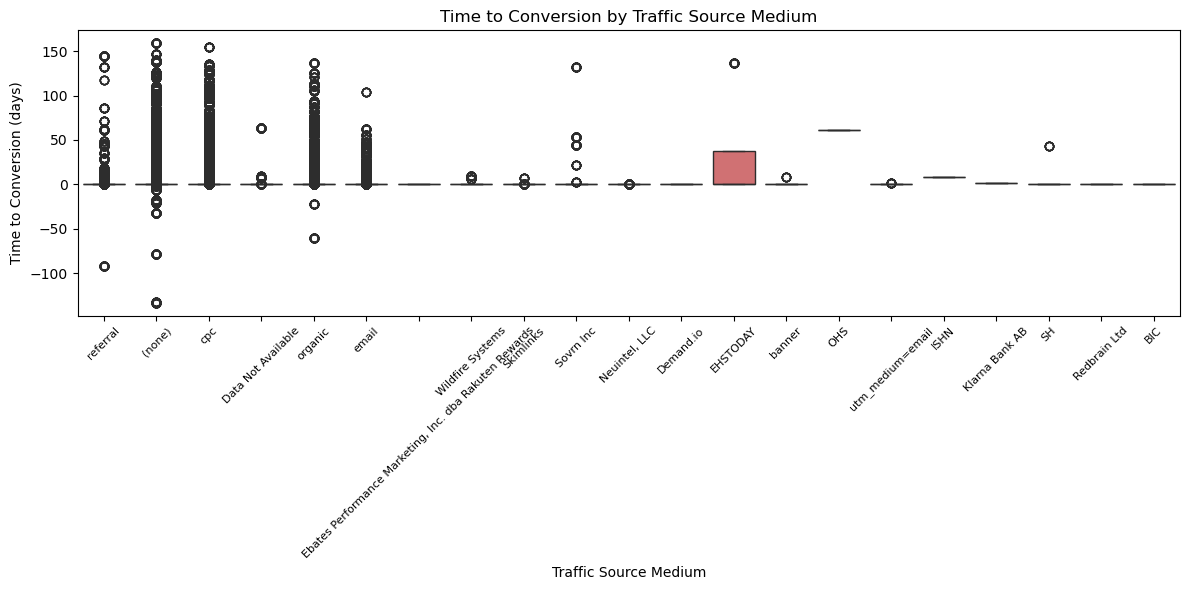

In [210]:
# visualize the average time to conversion by traffic source medium in boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='traffic_source_medium', y='time_to_conversion', data=data, palette='plasma')
plt.title('Time to Conversion by Traffic Source Medium')
plt.xlabel('Traffic Source Medium')
plt.ylabel('Time to Conversion (days)')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

In [211]:
# display the average time to conversion by traffic source medium in df
avg_time_to_conversion_medium = data.groupby('traffic_source_medium')['time_to_conversion'].mean().reset_index()
avg_time_to_conversion_medium.sort_values(by='time_to_conversion', ascending=False, inplace=True)
avg_time_to_conversion_medium

,traffic_source_medium,time_to_conversion
9,OHS,61.073083
4,EHSTODAY,28.300700
13,Sovrn Inc,9.573657
6,ISHN,8.016759
19,referral,3.850007
0,(none),2.919076
17,email,2.365653
2,Data Not Available,2.293783
16,cpc,2.270592
18,organic,2.175542


C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\3262258504.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='traffic_source', y='time_to_conversion', data=data, ci=None, palette='mako')
C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\3262258504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traffic_source', y='time_to_conversion', data=data, ci=None, palette='mako')


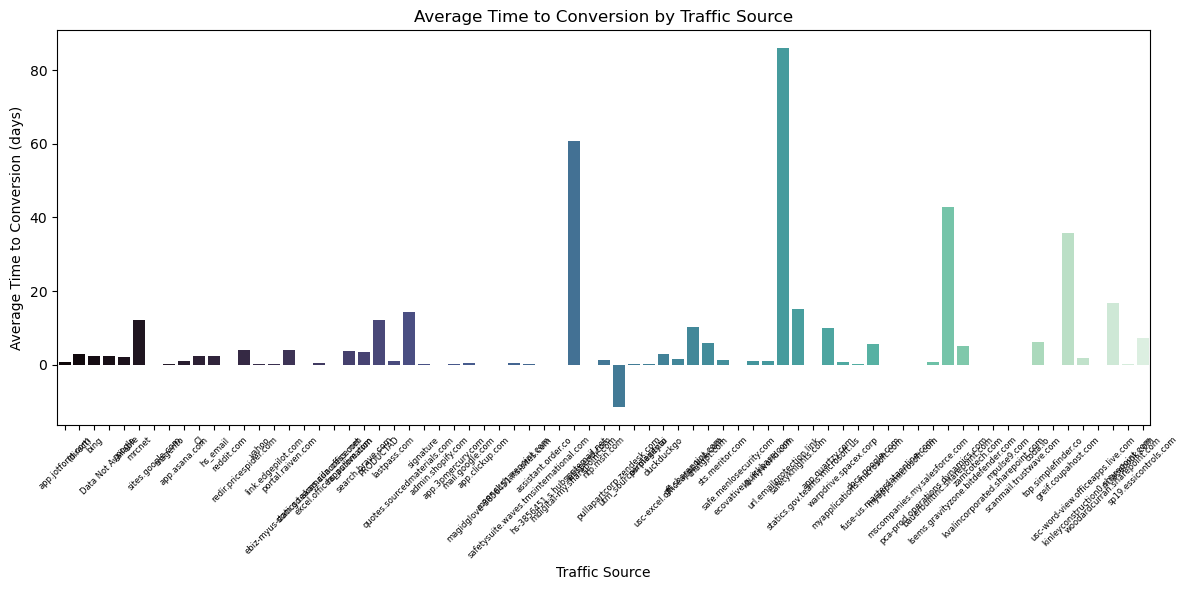

In [212]:
# visualize the average time to conversion by traffic source
plt.figure(figsize=(12, 6))
sns.barplot(x='traffic_source', y='time_to_conversion', data=data, ci=None, palette='mako')
plt.title('Average Time to Conversion by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Average Time to Conversion (days)')
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()
plt.show()

C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\3302153732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traffic_source', y='time_to_conversion', data=data, palette='mako')


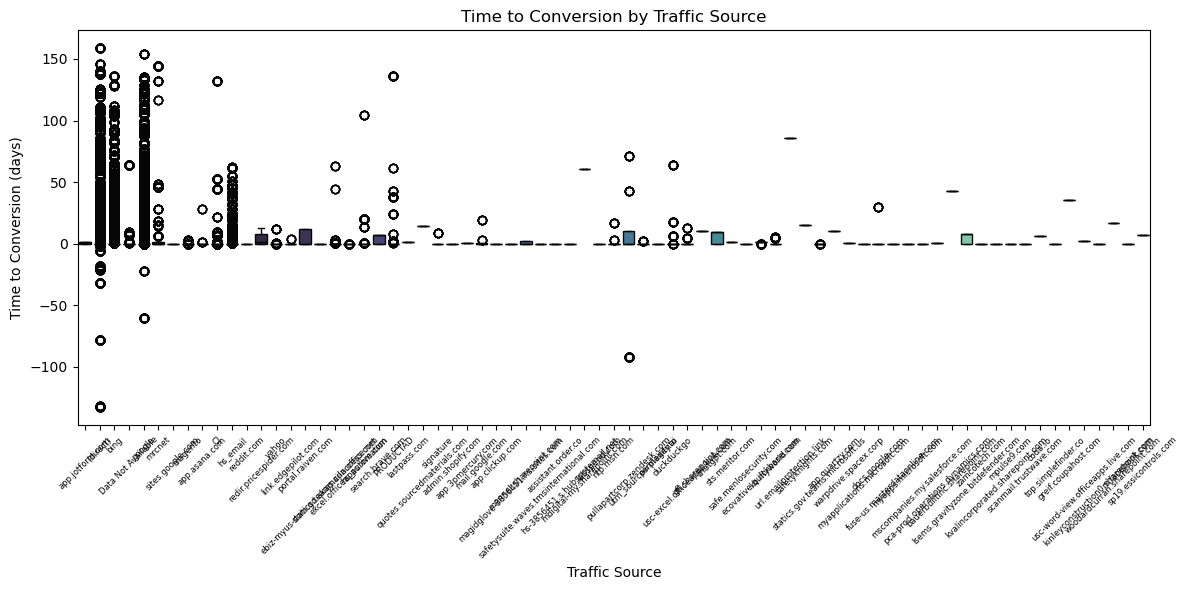

In [213]:
# visualize the average time to conversion by traffic source in boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='traffic_source', y='time_to_conversion', data=data, palette='mako')
plt.title('Time to Conversion by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Time to Conversion (days)')
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()
plt.show()

In [214]:
# display the average time to conversion by traffic source in descending order
avg_time_to_conversion_source = data.groupby('traffic_source')['time_to_conversion'].mean().reset_index()
avg_time_to_conversion_source.sort_values(by='time_to_conversion', ascending=False, inplace=True)
avg_time_to_conversion_source.head(20)

,traffic_source,time_to_conversion
65,url.emailprotection.link,85.950176
38,mdigital-my.sharepoint.com,60.844886
11,bauerbuiltinc.sharepoint.com,42.701566
23,greif.coupahost.com,35.852292
70,woodardcurran.sharepoint.com,16.622600
54,safetyknights.com,15.243976
50,quotes.sourcedmaterials.com,14.258129
41,mrcnet,12.124351
3,PRODUCTAD,12.018134
21,gfl.sharepoint.com,10.204399


# Feature Engineering

In [215]:
data.columns

Index(['user_pseudo_id', 'session_id', 'event_sequence', 'event_name',
       'session_label', 'session_sequence', 'session_duration',
       'customer_type', 'traffic_source_medium', 'traffic_source',
       'device_category', 'total_item_quantity', 'unique_items',
       'time_to_conversion'],
      dtype='object')

In [216]:
input = data[['time_to_conversion', 'event_name', 'session_duration', 'customer_type',
                                     'traffic_source_medium', 'traffic_source', 
                                     'device_category', 'total_item_quantity',
                                     'unique_items']]

input.head(1)

,time_to_conversion,event_name,session_duration,customer_type,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
0,0.002804,first_visit,250944587,NaN,referral,app.jotform.com,desktop,NaN,NaN


In [217]:
# display in df of missing values count and percentage
missing_values = input.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / input.shape[0])
missing_values.sort_values(by='Missing Values', ascending=False, inplace=True)
missing_values.reset_index(drop=True, inplace=True)
missing_values

,Column,Missing Values,Percentage
0,customer_type,525927,0.842272
1,total_item_quantity,516645,0.827406
2,unique_items,516645,0.827406
3,traffic_source_medium,1378,0.002207
4,traffic_source,951,0.001523
5,time_to_conversion,0,0.000000
6,session_duration,0,0.000000
7,event_name,0,0.000000
8,device_category,0,0.000000


In [218]:
# fill missing values with 'X' in categorical variables
input[['event_name', 'customer_type', 'traffic_source_medium', 'traffic_source', 
       'device_category']] = input[['event_name', 'customer_type', 'traffic_source_medium', 'traffic_source', 
                                    'device_category']].fillna('X')

input.head(1)


C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\2916685370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input[['event_name', 'customer_type', 'traffic_source_medium', 'traffic_source',


,time_to_conversion,event_name,session_duration,customer_type,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
0,0.002804,first_visit,250944587,X,referral,app.jotform.com,desktop,NaN,NaN


In [219]:
# one hot encoding for categorical variables
input = pd.get_dummies(input, columns=['event_name', 'customer_type', 'traffic_source_medium',
                                     'traffic_source', 'device_category'], drop_first=False)
input.head(1)


,time_to_conversion,session_duration,total_item_quantity,unique_items,event_name_CustomerLoggedInSession,event_name_account_add_to_cart,event_name_account_all_clicks,event_name_account_order_search,event_name_account_order_search_filter,event_name_account_order_selected,...,traffic_source_usc-excel.officeapps.live.com,traffic_source_usc-word-view.officeapps.live.com,traffic_source_utm_source=magento,traffic_source_warpdrive.spacex.corp,traffic_source_woodardcurran.sharepoint.com,traffic_source_yahoo,traffic_source_zamcotech.com,device_category_desktop,device_category_mobile,device_category_tablet
0,0.002804,250944587,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [220]:
# add columns: total_item_quantity_X, unique_items_X, if there are null values in total_item_quantity or unique_items
input['total_item_quantity_X'] = input['total_item_quantity'].isnull().astype(int)
input['unique_items_X'] = input['unique_items'].isnull().astype(int)
input.head(1)

,time_to_conversion,session_duration,total_item_quantity,unique_items,event_name_CustomerLoggedInSession,event_name_account_add_to_cart,event_name_account_all_clicks,event_name_account_order_search,event_name_account_order_search_filter,event_name_account_order_selected,...,traffic_source_utm_source=magento,traffic_source_warpdrive.spacex.corp,traffic_source_woodardcurran.sharepoint.com,traffic_source_yahoo,traffic_source_zamcotech.com,device_category_desktop,device_category_mobile,device_category_tablet,total_item_quantity_X,unique_items_X
0,0.002804,250944587,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,1,1


In [221]:
# set false to 0 and true to 1 for boolean variables
bool_cols = input.select_dtypes(include='bool').columns
input[bool_cols] = input[bool_cols].astype(int)
input.head(1)

,time_to_conversion,session_duration,total_item_quantity,unique_items,event_name_CustomerLoggedInSession,event_name_account_add_to_cart,event_name_account_all_clicks,event_name_account_order_search,event_name_account_order_search_filter,event_name_account_order_selected,...,traffic_source_utm_source=magento,traffic_source_warpdrive.spacex.corp,traffic_source_woodardcurran.sharepoint.com,traffic_source_yahoo,traffic_source_zamcotech.com,device_category_desktop,device_category_mobile,device_category_tablet,total_item_quantity_X,unique_items_X
0,0.002804,250944587,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [222]:
# display the correlation of customer_type_X with other variables
corr = input.corr()
corr['customer_type_X'].sort_values(ascending=False).head(20)

customer_type_X                   1.000000
event_name_page_view              0.218653
event_name_user_engagement        0.206849
event_name_scroll                 0.170569
event_name_customer_session       0.117898
event_name_view_item              0.093835
event_name_add_shipping_info      0.081677
event_name_add_to_cart            0.079838
event_name_begin_checkout         0.060472
event_name_view_search_results    0.055008
event_name_session_start          0.054675
event_name_first_visit            0.054675
event_name_view_cart              0.052320
event_name_add_payment_info       0.050903
event_name_purchase               0.048452
event_name_ad_nav_click           0.034312
event_name_internal_search        0.032778
event_name_remove_from_cart       0.026535
event_name_mpCustomer_session     0.022803
event_name_login                  0.020791
Name: customer_type_X, dtype: float64

In [223]:
corr['customer_type_X'].sort_values(ascending=True).head(20)

event_name_CustomerLoggedInSession         -0.911499
customer_type_notLoggedIn                  -0.696896
customer_type_corporate                    -0.502810
customer_type_web                          -0.400479
event_name_mpCustomerLoggedInSession       -0.252584
event_name_mpCustomerNotLoggedInSession    -0.218072
total_item_quantity_X                      -0.197643
unique_items_X                             -0.197643
traffic_source_medium_Data Not Available   -0.015093
traffic_source_Data Not Available          -0.015093
traffic_source_perplexity.ai               -0.011849
traffic_source_medium_SH                   -0.009667
traffic_source_PRODUCTAD                   -0.009023
traffic_source_medium_email                -0.008341
traffic_source_chatgpt.com                 -0.008242
device_category_mobile                     -0.008049
traffic_source_hs_email                    -0.007501
traffic_source_medium_banner               -0.006492
traffic_source_signature                   -0.

In [224]:
events_to_check = ['CustomerLoggedInSession', 'mpCustomerNotLoggedInSession', 'mpCustomerLoggedInSession']
data[data['event_name'].isin(events_to_check) & data['customer_type'].isnull()].shape

(1361, 14)

In [225]:
# drop rows if it has specific events and null customer types in the same time
print("Before dropping:", data.shape)
events_to_check = ['CustomerLoggedInSession', 'mpCustomerNotLoggedInSession', 'mpCustomerLoggedInSession']
data = data[~(data['event_name'].isin(events_to_check) & data['customer_type'].isnull())]
print("After dropping:", data.shape)

Before dropping: (624415, 14)
After dropping: (623054, 14)


In [226]:
# group by user and session, then for rows with sepecific events, 
# get the value of customer_type, and set it to the whole session
data['customer_type'] = data.groupby(['user_pseudo_id', 'session_label'])['customer_type'].transform(
    lambda x: x.ffill().bfill() if x.isnull().any() else x)
data['customer_type'].isnull().sum()


C:\Users\laptop\AppData\Local\Temp\ipykernel_58072\580686494.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.ffill().bfill() if x.isnull().any() else x)


np.int64(193502)

In [227]:
# display the correlation of traffic_source_medium_X with other variables
corr['traffic_source_medium_X'].sort_values(ascending=False).head(20)

traffic_source_medium_X              1.000000
traffic_source_X                     0.830456
traffic_source_chatgpt.com           0.528951
device_category_mobile               0.043480
event_name_scroll                    0.010374
unique_items                         0.007262
time_to_conversion                   0.007061
customer_type_X                      0.006306
event_name_customer_session          0.005623
event_name_facet_click               0.004254
event_name_featured_sub_nav_click    0.004032
event_name_ad_edit_user              0.003311
event_name_view_item                 0.002821
total_item_quantity_X                0.002243
unique_items_X                       0.002243
customer_type_notLoggedIn            0.001990
session_duration                     0.001243
event_name_videoProgress75          -0.000060
event_name_videoProgress25          -0.000060
event_name_videoProgress50          -0.000060
Name: traffic_source_medium_X, dtype: float64

In [228]:
corr['traffic_source_medium_X'].sort_values(ascending=True).head(20)

device_category_desktop                    -0.042842
traffic_source_google                      -0.042482
traffic_source_medium_cpc                  -0.041151
traffic_source_medium_(none)               -0.034014
traffic_source_(direct)                    -0.034014
traffic_source_medium_organic              -0.020888
traffic_source_bing                        -0.019459
customer_type_corporate                    -0.010233
total_item_quantity                        -0.008751
traffic_source_medium_email                -0.007801
traffic_source_hs_email                    -0.007528
event_name_CustomerLoggedInSession         -0.006752
traffic_source_medium_referral             -0.005690
customer_type_web                          -0.004296
traffic_source_CJ                          -0.004209
traffic_source_Data Not Available          -0.003249
traffic_source_medium_Data Not Available   -0.003249
traffic_source_mrcnet                      -0.002559
event_name_add_to_cart                     -0.

In [229]:
# display the correlation of traffic_source_X with other variables
corr['traffic_source_X'].sort_values(ascending=False).head(20)

traffic_source_X                           1.000000
traffic_source_medium_X                    0.830456
event_name_scroll                          0.017710
customer_type_X                            0.013295
event_name_customer_session                0.011544
device_category_mobile                     0.006402
event_name_facet_click                     0.005881
event_name_featured_sub_nav_click          0.005106
event_name_ad_edit_user                    0.004144
session_duration                           0.003342
time_to_conversion                         0.002716
total_item_quantity_X                      0.001862
unique_items_X                             0.001862
event_name_mpCustomerNotLoggedInSession    0.001852
event_name_mpCustomerLoggedInSession       0.001054
event_name_session_start                   0.001010
event_name_first_visit                     0.001010
event_name_login                           0.000694
event_name_begin_checkout                  0.000535
event_name_p

In [230]:
corr['traffic_source_medium_X'].sort_values(ascending=True).head(20)

device_category_desktop                    -0.042842
traffic_source_google                      -0.042482
traffic_source_medium_cpc                  -0.041151
traffic_source_medium_(none)               -0.034014
traffic_source_(direct)                    -0.034014
traffic_source_medium_organic              -0.020888
traffic_source_bing                        -0.019459
customer_type_corporate                    -0.010233
total_item_quantity                        -0.008751
traffic_source_medium_email                -0.007801
traffic_source_hs_email                    -0.007528
event_name_CustomerLoggedInSession         -0.006752
traffic_source_medium_referral             -0.005690
customer_type_web                          -0.004296
traffic_source_CJ                          -0.004209
traffic_source_Data Not Available          -0.003249
traffic_source_medium_Data Not Available   -0.003249
traffic_source_mrcnet                      -0.002559
event_name_add_to_cart                     -0.

In [231]:
# display the correlation of total_item_quantity_X with other variables
corr['total_item_quantity_X'].sort_values(ascending=False).head(20)

unique_items_X                             1.000000
total_item_quantity_X                      1.000000
event_name_page_view                       0.230770
event_name_user_engagement                 0.218312
event_name_CustomerLoggedInSession         0.180151
event_name_scroll                          0.180021
customer_type_notLoggedIn                  0.137737
event_name_customer_session                0.124431
customer_type_corporate                    0.099377
customer_type_web                          0.079152
event_name_view_search_results             0.058056
event_name_session_start                   0.057705
event_name_first_visit                     0.057705
event_name_mpCustomerNotLoggedInSession    0.053356
event_name_mpCustomerLoggedInSession       0.049922
time_to_conversion                         0.048010
event_name_ad_nav_click                    0.036213
event_name_internal_search                 0.034594
event_name_mpCustomer_session              0.024067
session_dura

In [232]:
corr['total_item_quantity_X'].sort_values(ascending=True).head(20)

event_name_view_item                       -0.469246
event_name_add_shipping_info               -0.409907
event_name_add_to_cart                     -0.399151
event_name_begin_checkout                  -0.303958
event_name_add_payment_info                -0.253973
event_name_purchase                        -0.241740
event_name_view_cart                       -0.227590
customer_type_X                            -0.197643
event_name_remove_from_cart                -0.133703
device_category_mobile                     -0.022114
traffic_source_google                      -0.017106
traffic_source_medium_cpc                  -0.011090
traffic_source_medium_Data Not Available   -0.010052
traffic_source_Data Not Available          -0.010052
event_name_view_item_list                  -0.009220
traffic_source_reddit.com                  -0.006606
traffic_source_excel.officeapps.live.com   -0.005839
traffic_source_medium_organic              -0.005450
traffic_source_magento                     -0.

In [233]:
# display correlation of unique_items_X with other variables
corr['unique_items_X'].sort_values(ascending=False).head(20)

unique_items_X                             1.000000
total_item_quantity_X                      1.000000
event_name_page_view                       0.230770
event_name_user_engagement                 0.218312
event_name_CustomerLoggedInSession         0.180151
event_name_scroll                          0.180021
customer_type_notLoggedIn                  0.137737
event_name_customer_session                0.124431
customer_type_corporate                    0.099377
customer_type_web                          0.079152
event_name_view_search_results             0.058056
event_name_session_start                   0.057705
event_name_first_visit                     0.057705
event_name_mpCustomerNotLoggedInSession    0.053356
event_name_mpCustomerLoggedInSession       0.049922
time_to_conversion                         0.048010
event_name_ad_nav_click                    0.036213
event_name_internal_search                 0.034594
event_name_mpCustomer_session              0.024067
session_dura

In [234]:
corr['unique_items_X'].sort_values(ascending=True).head(20)

event_name_view_item                       -0.469246
event_name_add_shipping_info               -0.409907
event_name_add_to_cart                     -0.399151
event_name_begin_checkout                  -0.303958
event_name_add_payment_info                -0.253973
event_name_purchase                        -0.241740
event_name_view_cart                       -0.227590
customer_type_X                            -0.197643
event_name_remove_from_cart                -0.133703
device_category_mobile                     -0.022114
traffic_source_google                      -0.017106
traffic_source_medium_cpc                  -0.011090
traffic_source_medium_Data Not Available   -0.010052
traffic_source_Data Not Available          -0.010052
event_name_view_item_list                  -0.009220
traffic_source_reddit.com                  -0.006606
traffic_source_excel.officeapps.live.com   -0.005839
traffic_source_medium_organic              -0.005450
traffic_source_magento                     -0.

In [235]:
data[['session_id', 'total_item_quantity']].value_counts().head(20)

session_id  total_item_quantity
1746803415  24.0                   44
1751661196  1.0                    36
1747838046  12.0                   36
1741963718  9.0                    35
            1.0                    34
1748295581  1.0                    33
1738548697  1.0                    32
1749804711  1.0                    32
1748875489  3.0                    31
1740102421  1.0                    31
1740088094  20.0                   29
1738958266  18.0                   29
1753471378  1.0                    29
1740570901  2.0                    28
1752068835  15.0                   28
1742479523  1.0                    28
1741376884  1.0                    28
1739401749  1.0                    28
1741108850  12.0                   28
1750860303  1.0                    27
Name: count, dtype: int64

In [236]:
# group by user and session, then count how many different total_item_quantity values are there
# also count how many different unique_items values are there in the session, 
# and store them in a df
session_summary = data.groupby(['user_pseudo_id', 'session_id']).agg(
    total_item_quantity_count=('total_item_quantity', 'nunique'),
    unique_items_count=('unique_items', 'nunique')
).sort_values(by=['total_item_quantity_count', 'unique_items_count'], ascending=False)
session_summary[(session_summary['total_item_quantity_count'] > 1) | (session_summary['unique_items_count'] > 1)].shape

(7600, 2)

In [237]:
session_summary[(session_summary['total_item_quantity_count'] == 1)].shape

(1578, 2)

In [238]:
session_summary[(session_summary['unique_items_count'] == 1)].shape

(2883, 2)

# Feature Engineering 2

In [239]:
# # drop rows if it has specific events and null customer types in the same time
# print("Before dropping:", data.shape)
# events_to_check = ['CustomerLoggedInSession', 'mpCustomerNotLoggedInSession', 'mpCustomerLoggedInSession']
# data = data[~(data['event_name'].isin(events_to_check) & data['customer_type'].isnull())]
# print("After dropping:", data.shape)

In [240]:
data.shape

(623054, 14)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623054 entries, 0 to 624414
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_pseudo_id         623054 non-null  object 
 1   session_id             623054 non-null  int64  
 2   event_sequence         623054 non-null  int64  
 3   event_name             623054 non-null  object 
 4   session_label          623054 non-null  object 
 5   session_sequence       623054 non-null  int64  
 6   session_duration       623054 non-null  int64  
 7   customer_type          429552 non-null  object 
 8   traffic_source_medium  621676 non-null  object 
 9   traffic_source         622103 non-null  object 
 10  device_category        623054 non-null  object 
 11  total_item_quantity    107770 non-null  float64
 12  unique_items           107770 non-null  float64
 13  time_to_conversion     623054 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory

In [242]:
input_2 = data[['time_to_conversion', 'event_name', 'session_duration', 'customer_type',
                                     'traffic_source_medium', 'traffic_source', 
                                     'device_category']]

In [243]:
# drop the rows with negative time to conversion
input_2 = input_2[input_2['time_to_conversion'] >= 0]

In [244]:
input_2.shape

(622438, 7)

In [245]:
# round time to conversion to the nearest integer
input_2['time_to_conversion'] = input_2['time_to_conversion'].round().astype(int)

input_2['time_to_conversion'].value_counts().sort_index()

time_to_conversion
0      533052
1       20932
2        8318
3        4302
4        4166
        ...  
140        27
144        90
146        23
154        16
159        57
Name: count, Length: 130, dtype: int64

In [246]:
input_2['time_to_conversion'].value_counts().sort_index().head(20)

time_to_conversion
0     533052
1      20932
2       8318
3       4302
4       4166
5       3525
6       3884
7       4315
8       1820
9       1807
10      1450
11      1584
12      1651
13      1795
14      1699
15      1143
16       670
17       720
18       817
19       358
Name: count, dtype: int64

In [247]:
input_2['time_to_conversion'].value_counts().sort_index()[20:40]

time_to_conversion
20     797
21    1165
22     875
23     493
24     966
25     897
26     739
27     371
28     740
29     936
30     412
31     300
32     375
33     528
34     828
35     376
36     240
37     515
38     422
39     336
Name: count, dtype: int64

In [248]:
# binning time to conversion: 0 day, 1 day, 2 day, 3-7 days, 8-14 days, 15-30 days, 31+ days
bins = [0, 1, 2, 3, 7, 14, 30, np.inf]
labels = ['0 day', '1 day', '2 day', '3-7 days', '8-14 days', '15-30 days', '31+ days']
input_2['time_to_conversion_binned'] = pd.cut(input_2['time_to_conversion'], bins=bins, labels=labels, right=False)

# drop time_to_conversion column as it is not needed anymore
input_2.drop(columns=['time_to_conversion'], inplace=True)

input_2['time_to_conversion_binned'].value_counts().sort_index()

time_to_conversion_binned
0 day         533052
1 day          20932
2 day           8318
3-7 days       15877
8-14 days      14422
15-30 days     13386
31+ days       16451
Name: count, dtype: int64

In [249]:
input_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622438 entries, 0 to 624414
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   event_name                 622438 non-null  object  
 1   session_duration           622438 non-null  int64   
 2   customer_type              429171 non-null  object  
 3   traffic_source_medium      621060 non-null  object  
 4   traffic_source             621487 non-null  object  
 5   device_category            622438 non-null  object  
 6   time_to_conversion_binned  622438 non-null  category
dtypes: category(1), int64(1), object(5)
memory usage: 33.8+ MB


In [250]:
# fill null values with 'Unknown' in categorical variables
input_2[['event_name', 'customer_type', 'traffic_source_medium', 'traffic_source',
         'device_category']] = input_2[['event_name', 'customer_type', 'traffic_source_medium', 'traffic_source',
                                         'device_category']].fillna('Unknown')

In [251]:
input_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622438 entries, 0 to 624414
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   event_name                 622438 non-null  object  
 1   session_duration           622438 non-null  int64   
 2   customer_type              622438 non-null  object  
 3   traffic_source_medium      622438 non-null  object  
 4   traffic_source             622438 non-null  object  
 5   device_category            622438 non-null  object  
 6   time_to_conversion_binned  622438 non-null  category
dtypes: category(1), int64(1), object(5)
memory usage: 33.8+ MB


In [252]:
input_2.head(1)

,event_name,session_duration,customer_type,traffic_source_medium,traffic_source,device_category,time_to_conversion_binned
0,first_visit,250944587,Unknown,referral,app.jotform.com,desktop,0 day


In [253]:
# one hot encoding for categorical variables
input_2 = pd.get_dummies(input_2, columns=['event_name', 'customer_type', 'traffic_source_medium',
                                         'traffic_source', 'device_category'], drop_first=True)
input_2.shape

(622438, 165)

In [254]:
# set false to 0 and true to 1 for boolean variables
bool_cols = input_2.select_dtypes(include='bool').columns
input_2[bool_cols] = input_2[bool_cols].astype(int)

In [255]:
input_2.head(1)

,session_duration,time_to_conversion_binned,event_name_account_add_to_cart,event_name_account_all_clicks,event_name_account_order_search,event_name_account_order_search_filter,event_name_account_order_selected,event_name_account_update_address,event_name_ad_add_address,event_name_ad_add_user,...,traffic_source_url.emailprotection.link,traffic_source_usc-excel.officeapps.live.com,traffic_source_usc-word-view.officeapps.live.com,traffic_source_utm_source=magento,traffic_source_warpdrive.spacex.corp,traffic_source_woodardcurran.sharepoint.com,traffic_source_yahoo,traffic_source_zamcotech.com,device_category_mobile,device_category_tablet
0,250944587,0 day,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [256]:
# set time_to_conversion_binned as the target variable
y = input_2['time_to_conversion_binned']
X = input_2.drop(columns=['time_to_conversion_binned'])
X.shape, y.shape

((622438, 164), (622438,))

In [257]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((497950, 164), (124488, 164), (497950,), (124488,))

In [258]:
# train decision tree classifier with hypertuning
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# save the best model
joblib.dump(best_dt, 'best_decision_tree_model.pkl')

# display feature importances
feature_importances = pd.DataFrame(best_dt.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.to_csv('dt_feature_importances.csv')

# load the best model
best_dt = joblib.load('best_decision_tree_model.pkl')

# evaluate the model on the test set
y_pred = best_dt.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

# display classification report
print(classification_report(y_test, y_pred))

# display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# visualize the decision tree
plt.figure(figsize=(2000, 1000))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=best_dt.classes_, rounded=True)
plt.title('Decision Tree')

# save the decision tree plot
plt.savefig('decision_tree.png', bbox_inches='tight')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.9988512902901897


PermissionError: [Errno 13] Permission denied: 'dt_feature_importances.csv'

Test accuracy: 0.9992368742368742
              precision    recall  f1-score   support

       0 day       1.00      1.00      1.00    106611
       1 day       1.00      0.99      1.00      4187
  15-30 days       1.00      1.00      1.00      2677
       2 day       1.00      1.00      1.00      1664
    3-7 days       1.00      1.00      1.00      3175
    31+ days       1.00      1.00      1.00      3290
   8-14 days       1.00      1.00      1.00      2884

    accuracy                           1.00    124488
   macro avg       1.00      1.00      1.00    124488
weighted avg       1.00      1.00      1.00    124488



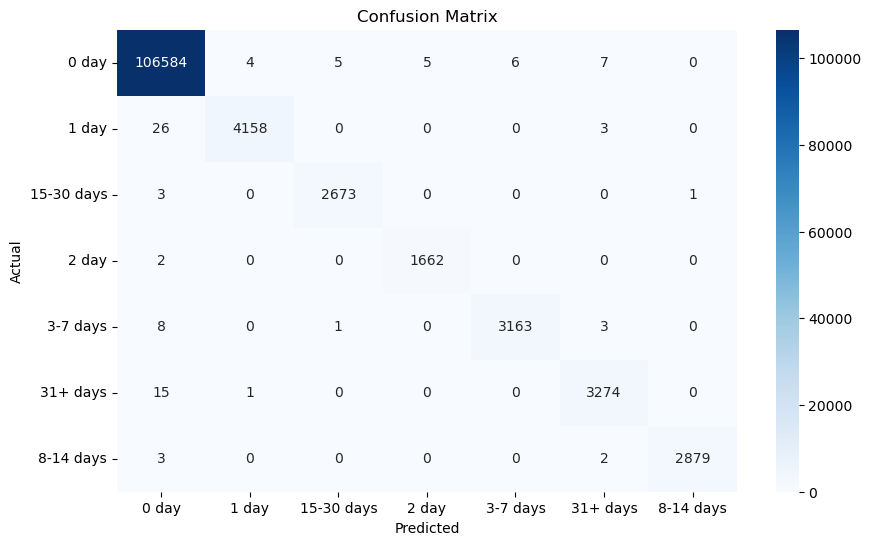

MemoryError: bad allocation

Error in callback <function _draw_all_if_interactive at 0x0000020061A7EA20> (for post_execute), with arguments args (),kwargs {}:


MemoryError: bad allocation

MemoryError: bad allocation

<Figure size 200000x100000 with 1 Axes>

In [ ]:
feature_importances.to_csv('dt_feature_importances.csv')

# load the best model
best_dt = joblib.load('best_decision_tree_model.pkl')

# evaluate the model on the test set
y_pred = best_dt.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

# display classification report
print(classification_report(y_test, y_pred))

# display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [263]:
# visualize the decision tree
plt.figure(figsize=(800, 400))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=best_dt.classes_, rounded=True)
plt.title('Decision Tree')

# save the decision tree plot
plt.savefig('decision_tree.png', bbox_inches='tight')

MemoryError: bad allocation

Error in callback <function _draw_all_if_interactive at 0x0000020061A7EA20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

MemoryError: bad allocation

<Figure size 80000x40000 with 1 Axes>

Test accuracy: 0.9992208084313348
              precision    recall  f1-score   support

       0 day       1.00      1.00      1.00    106611
       1 day       1.00      0.99      1.00      4187
  15-30 days       1.00      1.00      1.00      2677
       2 day       1.00      1.00      1.00      1664
    3-7 days       1.00      0.99      1.00      3175
    31+ days       1.00      1.00      1.00      3290
   8-14 days       1.00      1.00      1.00      2884

    accuracy                           1.00    124488
   macro avg       1.00      1.00      1.00    124488
weighted avg       1.00      1.00      1.00    124488



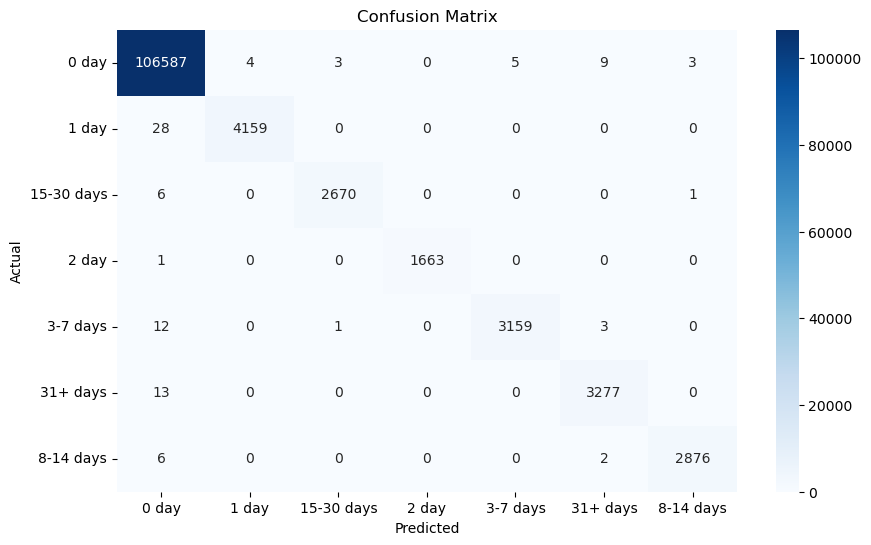

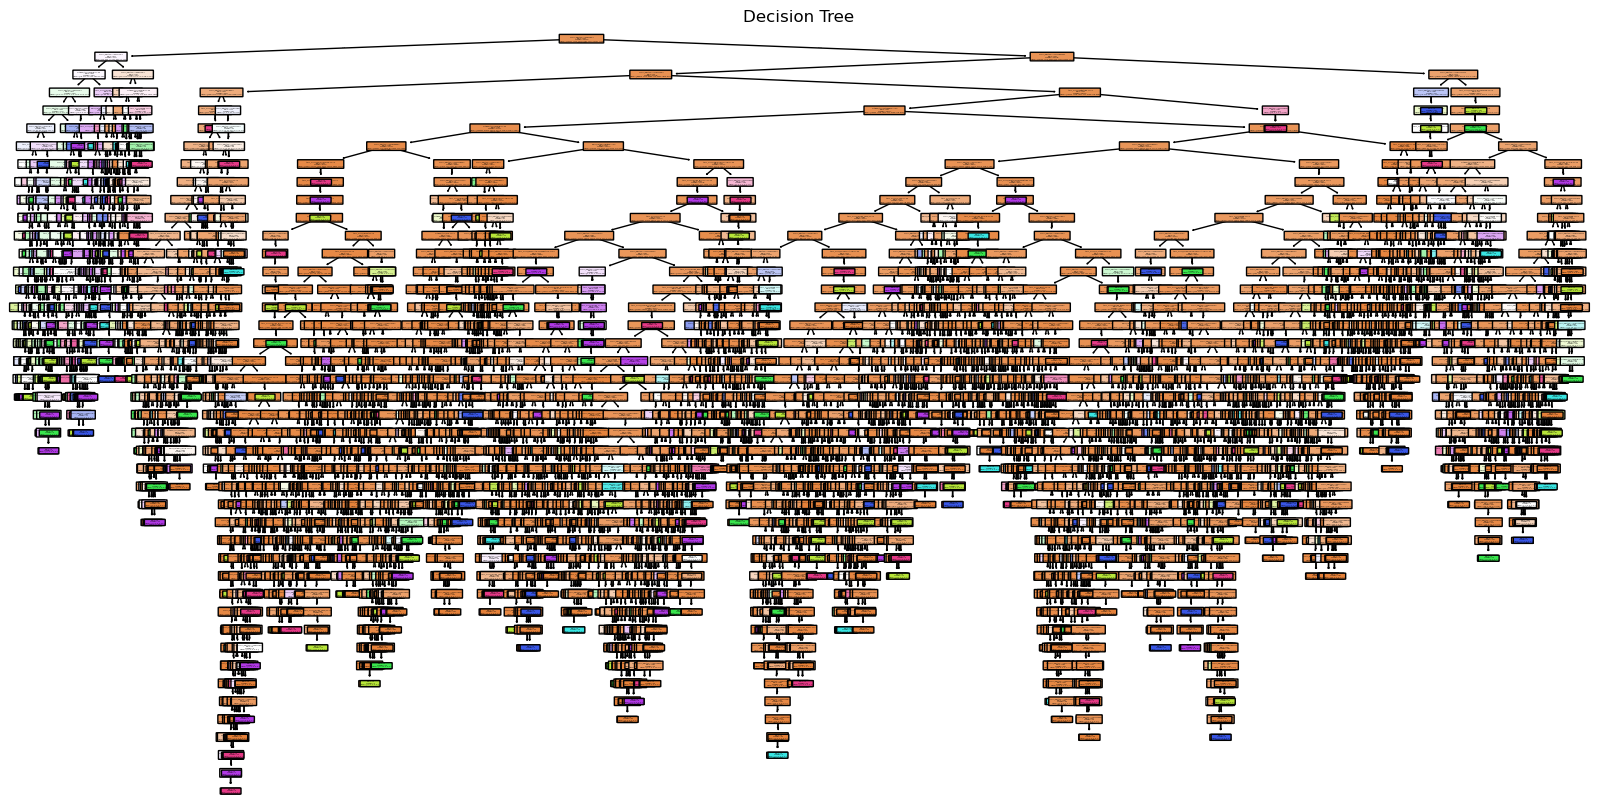

In [ ]:
# train decision tree classifier with hypertuning
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# save the best model
joblib.dump(best_dt, 'best_decision_tree_model.pkl')

# load the best model
best_dt = joblib.load('best_decision_tree_model.pkl')

# evaluate the model on the test set
y_pred = best_dt.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

# display classification report
print(classification_report(y_test, y_pred))

# display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# display feature importances
feature_importances = pd.DataFrame(best_dt.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.to_csv('dt_feature_importances.csv')

# visualize the decision tree
plt.figure(figsize=(800, 400))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=best_dt.classes_, rounded=True)
plt.title('Decision Tree')

# save the decision tree plot
plt.savefig('decision_tree.png', bbox_inches='tight')

In [171]:
# train lightgbm model with hypertuning
# define the model
model = lgb.LGBMClassifier(objective='multiclass', num_classes=len(y.unique()), random_state=42)

# define the parameters for grid search
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# train the model with the best parameters
best_model = grid_search.best_estimator_

# save the model
joblib.dump(best_model, 'lightgbm_model.pkl')

# load the model
loaded_model = joblib.load('lightgbm_model.pkl')

# make predictions on the test set
y_pred = best_model.predict(X_test)

# evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# visualize feature importance
lgb.plot_importance(best_model, max_num_features=20, importance_type='gain',
                    title='Feature Importance', xlabel='Importance (gain)', ylabel='Features')
plt.show()

# save the feature importance plot
plt.savefig('feature_importance.png', bbox_inches='tight')

Fitting 3 folds for each of 81 candidates, totalling 243 fits


ValueError: 
All the 243 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\laptop\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
    ~~~~~~~~~~~^
        X,
        ^^
    ...<12 lines>...
        init_model=init_model,
        ^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ~~~~~^
        params=params,
        ^^^^^^^^^^^^^^
    ...<6 lines>...
        callbacks=callbacks,
        ^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\engine.py", line 297, in train
    booster = Booster(params=params, train_set=train_set)
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3656, in __init__
    train_set.construct()
    ~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2590, in construct
    self._lazy_init(
    ~~~~~~~~~~~~~~~^
        data=self.data,
        ^^^^^^^^^^^^^^^
    ...<9 lines>...
        position=self.position,
        ^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2227, in _lazy_init
    return self.set_feature_name(feature_name)
           ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3046, in set_feature_name
    _safe_call(
    ~~~~~~~~~~^
        _LIB.LGBM_DatasetSetFeatureNames(
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<3 lines>...
        )
        ^
    )
    ^
  File "c:\Users\laptop\anaconda3\Lib\site-packages\lightgbm\basic.py", line 313, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.


In [ ]:
# train xgboost model with hypertuning

# define the model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# define the parameters for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# perform grid search
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# print the best parameters
print("Best parameters found: ", grid_search_xgb.best_params_)

# train the model with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# save the model
joblib.dump(best_xgb_model, 'xgboost_model.pkl')

# load the model
loaded_xgb_model = joblib.load('xgboost_model.pkl')

# make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# visualize feature importance
xgb.plot_importance(best_xgb_model, max_num_features=20, importance_type='gain',
                    title='Feature Importance', xlabel='Importance (gain)', ylabel='Features')
plt.show()

# save the feature importance plot
plt.savefig('xgboost_feature_importance.png', bbox_inches='tight')

# Suplementary Analysis

In [174]:
# one hot encoding for time_to_conversion_binned
test = pd.get_dummies(input_2, columns=['time_to_conversion_binned'], drop_first=False)
test.head(1)

,session_duration,event_name_CustomerLoggedInSession,event_name_account_add_to_cart,event_name_account_all_clicks,event_name_account_order_search,event_name_account_order_search_filter,event_name_account_order_selected,event_name_account_update_address,event_name_ad_add_address,event_name_ad_add_user,...,device_category_desktop,device_category_mobile,device_category_tablet,time_to_conversion_binned_0 day,time_to_conversion_binned_1 day,time_to_conversion_binned_2 day,time_to_conversion_binned_3-7 days,time_to_conversion_binned_8-14 days,time_to_conversion_binned_15-30 days,time_to_conversion_binned_31+ days
0,250944587,0,0,0,0,0,0,0,0,0,...,1,0,0,True,False,False,False,False,False,False


In [ ]:
# display the correlation of time_to_conversion_binned with other variables
corr2 = test.corr()

KeyError: 'time_to_conversion_binned'

In [177]:
corr2['time_to_conversion_binned_0 day'].sort_values(ascending=False).head(20)

time_to_conversion_binned_0 day                                                 1.000000
customer_type_web                                                               0.062037
event_name_add_shipping_info                                                    0.055176
customer_type_corporate                                                         0.050677
event_name_purchase                                                             0.045867
event_name_add_payment_info                                                     0.043342
event_name_begin_checkout                                                       0.035966
device_category_mobile                                                          0.033431
event_name_add_to_cart                                                          0.026766
traffic_source_CJ                                                               0.021970
traffic_source_medium_cpc                                                       0.019161
traffic_source_bing  

In [178]:
corr2['time_to_conversion_binned_0 day'].sort_values(ascending=True).head(20)

time_to_conversion_binned_1 day          -0.455549
time_to_conversion_binned_31+ days       -0.402360
time_to_conversion_binned_3-7 days       -0.395091
time_to_conversion_binned_8-14 days      -0.376102
time_to_conversion_binned_15-30 days     -0.362033
time_to_conversion_binned_2 day          -0.284206
session_duration                         -0.073956
customer_type_notLoggedIn                -0.058248
traffic_source_ecovative.quickbase.com   -0.044654
traffic_source_chatgpt.com               -0.038647
traffic_source_safetyknights.com         -0.035023
device_category_desktop                  -0.033760
traffic_source_redir.pricespider.com     -0.030525
traffic_source_medium_Unknown            -0.030520
event_name_session_start                 -0.030502
event_name_first_visit                   -0.030502
customer_type_Unknown                    -0.027591
traffic_source_mrcnet                    -0.025220
traffic_source_medium_referral           -0.024929
event_name_view_search_results 

In [179]:
corr2['time_to_conversion_binned_1 day'].sort_values(ascending=False).head(20)

time_to_conversion_binned_1 day                    1.000000
traffic_source_ecovative.quickbase.com             0.100441
session_duration                                   0.065605
traffic_source_app.jotform.com                     0.038439
traffic_source_lastpass.com                        0.031137
customer_type_Unknown                              0.029173
traffic_source_mrcnet                              0.028530
traffic_source_medium_referral                     0.028249
traffic_source_medium_cpc                          0.024384
traffic_source_warpdrive.spacex.corp               0.017977
traffic_source_sts.meritor.com                     0.017977
traffic_source_google                              0.016768
customer_type_notLoggedIn                          0.016664
traffic_source_pca-prod.operations.dynamics.com    0.015193
traffic_source_redir.pricespider.com               0.014194
event_name_ad_delete_user                          0.012798
event_name_customer_session             

In [180]:
corr2['time_to_conversion_binned_1 day'].sort_values(ascending=True).head(20)

time_to_conversion_binned_0 day        -0.455549
customer_type_corporate                -0.032214
time_to_conversion_binned_31+ days     -0.030736
time_to_conversion_binned_3-7 days     -0.030181
time_to_conversion_binned_8-14 days    -0.028730
time_to_conversion_binned_15-30 days   -0.027656
customer_type_web                      -0.026073
traffic_source_medium_organic          -0.024287
time_to_conversion_binned_2 day        -0.021710
event_name_add_shipping_info           -0.021192
event_name_purchase                    -0.020833
event_name_add_payment_info            -0.018904
traffic_source_CJ                      -0.016721
traffic_source_bing                    -0.013687
event_name_begin_checkout              -0.013114
event_name_mpCustomerLoggedInSession   -0.009625
traffic_source_medium_Skimlinks        -0.008898
traffic_source_medium_Sovrn Inc        -0.008223
traffic_source_medium_(none)           -0.007562
traffic_source_(direct)                -0.007562
Name: time_to_conver

In [181]:
corr2['time_to_conversion_binned_2 day'].sort_values(ascending=False).head(20)

time_to_conversion_binned_2 day                     1.000000
traffic_source_medium_Klarna Bank AB                0.037728
session_duration                                    0.034062
traffic_source_medium_organic                       0.027477
traffic_source_usc-word-view.officeapps.live.com    0.026678
traffic_source_mennel.sharepoint.com                0.023866
customer_type_notLoggedIn                           0.023450
traffic_source_google                               0.016814
event_name_product_spec_click                       0.013864
traffic_source_medium_EHSTODAY                      0.009203
event_name_view_search_results                      0.008657
event_name_contact_form_submit                      0.008606
event_name_view_item                                0.008208
traffic_source_medium_utm_medium=email              0.006870
traffic_source_utm_source=magento                   0.006870
event_name_CustomerLoggedInSession                  0.006667
event_name_egt_form     

In [182]:
corr2['time_to_conversion_binned_2 day'].sort_values(ascending=True).head(20)

time_to_conversion_binned_0 day            -0.284206
customer_type_corporate                    -0.031661
time_to_conversion_binned_1 day            -0.021710
time_to_conversion_binned_31+ days         -0.019176
time_to_conversion_binned_3-7 days         -0.018829
time_to_conversion_binned_8-14 days        -0.017924
time_to_conversion_binned_15-30 days       -0.017254
event_name_add_shipping_info               -0.015555
event_name_purchase                        -0.013047
event_name_add_payment_info                -0.011901
traffic_source_hs_email                    -0.011663
traffic_source_medium_email                -0.011361
traffic_source_medium_referral             -0.009937
event_name_begin_checkout                  -0.008332
traffic_source_medium_Data Not Available   -0.008053
traffic_source_Data Not Available          -0.008053
event_name_mpCustomerLoggedInSession       -0.007306
traffic_source_CJ                          -0.006655
traffic_source_mrcnet                      -0.

In [ ]:
corr2['time_to_conversion_binned_3-7 days'].sort_values(ascending=False).head(20)

In [ ]:
corr2['time_to_conversion_binned_3-7 days'].sort_values(ascending=True).head(20)

In [ ]:
corr2['time_to_conversion_binned_8-14 days'].sort_values(ascending=False).head(20)

In [ ]:
corr2['time_to_conversion_binned_8-14 days'].sort_values(ascending=True).head(20)

In [ ]:
corr2['time_to_conversion_binned_15-30 day'].sort_values(ascending=False).head(20)

In [ ]:
corr2['time_to_conversion_binned_15-30 days'].sort_values(ascending=True).head(20)

In [ ]:
corr2['time_to_conversion_binned_31+ days'].sort_values(ascending=True).head(20)